In [2]:
# Regression ( 회귀 )
# 숫자값 예측이 목적 
# ex) 주택에 대한 정보 (방의 개수, 크기, 욕실 수 등 ) -> 주택의 판매 가격
# 이미지에서 어떤 항목의 경계 상자의 자료를 예측
# 인구 통계 ( 연령, 성별, 인종 등) -> 의료보험 비용 등등 예측 

# 입력 (데이터) -> 패턴을 발견하는 신경망 -> 출력 (예측)
# 1. 분석하기 쉬운 형태로 데이터를 준비
# 2. 패턴을 발견하는 신경망을 만드는 것 
# 3. 만든 신경망의 결과를 확인 

In [ ]:
# 앞으로 우리가 할일
# 1. 회귀 모델의 아키텍처를 확인
# 2. 입력과 출력의 형태를 만들어준다.
#    - 'X' (입력) : feature / 데이터 (입력)
#    - 'Y' (출력) : 레이블 (lable)   (출력)
# 3. 모델링 단계
#    1) 모델 생성
#    2) 모델 컴파일
#       - 손실 함수 적용
#       - 최적화 프로그램 설정
#       - 평가 지표 생성
#    3) 모델 피팅 (데이터에서 패턴을 찾는 과정)
# 4. 모델 평가
#    1) 모델 시각화
#    2) 학습 곡선 확인
#    3) 예측 결과를 실제 데이터와 비교 (평가 지표 사용)
# 5. 모델 저장 (나중의 사용을 위해서)
# 6. 모델 가져와서 사용하기

## 회귀 신경망의 일반적인 구조 (아키텍처)

신경망을 생성하는 방법은 매우 다양하다. 그래도 일반적인 방법이 존재

데이터 수집 -> 데이터에서 패턴 찾기 -> 결과 만들기



* Input Layer (입력층) : 특성 (feature, column, variable)의 갯수 (shape)

* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어짐 
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10 ~ 최대 100으로 이루어진다.
* Output Layer shape (출력층의 형태) : 우리가 예측값을 얻고자 하는 형태 (주택의 가격이라면 1)
* 은닉층 활성화 함수 : [RelU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

* 출력층 활성화 함수 : None, ReLU, logistic/tanh
* 손실함수의 경우 : MSE (Mean Square error), MAE (Mean absolute error) / Huber (MSE+MAE) : 특이값이 있으면 사용
* 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam

**hyperparameter** *(하이퍼파라미터)* : 머신러닝 분야에서 하이퍼파라미터라는 단어는 데이터 분석가나 개발자들이 설정하는 값

**parameter** *(파라미터)* : 분석가나 개발자들이 명시적으로 설정한 값이 아닌 모델이 스스로 파악한 값 


# Regression problem ( 회귀 문제 )

## 회귀 --> 특정 값을 예측 !

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

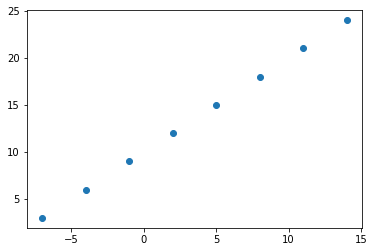

In [3]:
# feature 특성, 변수
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

모델을 만들기 전에 EDA (Explorary Data Analysis) 탐색적 자료 분석을 해서 

위의 경우 처럼 X, y 의 관계, 즉 패턴을 찾으려고 한다!

위의 패턴이라면 17은 어떤 값일까? -10은 어떤 값일까?

## 신경망 (neural network)로 작업을 할 때 가장 중요한 개념!

### **input shape (입력의 모양)** : 모델을 만들기 위한 데이터의 형태
### **output shaple (출력의 모양)** : 모델을 통해서 예측하고자 하는 데이터의 형태

문제에 따라 입력과 출력의 모양 각기 각각이다.

신경망은 숫자를 입력 받고, 숫자를 출력! 이 때 일반적으로 tensor나 array로 처리합니다.

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
house_info.shape

TensorShape([3])

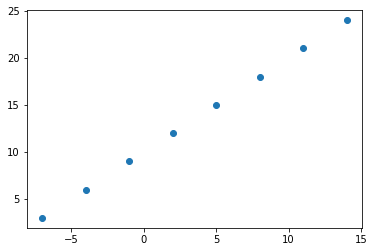

In [6]:
# feature 특성, 변수
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, type(input_shape), X[0].ndim, output_shape, type(output_shape), y[0].ndim

(TensorShape([]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 0,
 TensorShape([]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 0)

In [8]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## 모델링 과정
### 현재의 우리가 알고 있는 데이터, 입력의 shape, 출력의 shape,

일반적으로 tensorflow 에서는 모델을 생성하고 학습할 때 3단계를 실행 

1. **모델 정의** : 우리가 직접 신경망 (neural network)를 구성하는 레이어를 정의하거나 (전이학습시) 이전에 만들어 놓은 모델을 불러온다.  
2. **모델 컴파일** : 모델이 어떻게 실행될지 정의, 측정값 (손실함수, metric)와 개선을 하는 방법 (optimizer)
3. **모델 피팅** : 데이터에서 패턴을 찾도록 모델에게 일을 시킴 (X가 어떻게 y가 될까?)

In [9]:
## TODO : tf의 seed에 대해 정리 하기 
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

## epochs 의 의미 파악 
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 604ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 0s 6m

In [10]:
model.predict([17.0, -10.]) # epoch 200

array([[ 30.908516],
       [-15.668092]], dtype=float32)

### 위 모델의 결과를 봤을 때 27과 0을 생각했는데 많이 다르다
### 어떻게 해야 할까? 

## 모델 개선시키기 

1. **모델 정의 부분** : 레이어를 추가하거나, 레이어를 이루는 neuron 단위를 추가, 활성 함수를 변경
2. **모델 컴파일 부분** : optimizer를 변경, 최적화 함수를 수행하는 learning rate를 변경
3. **모델 피팅** : epoch를 늘려주거나, 데이터를 더 많이 준다.


In [11]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [13]:
# 원래 X, y의 관계 y = X+10의 관계
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [14]:
len(X), len(y)

(50, 50)

In [15]:
# 보통 학습 및 테스트 데이터를 나눌 때 80:20의 비율을 사용 
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

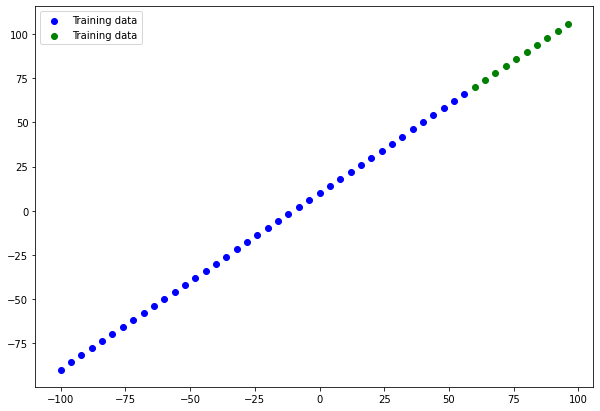

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Training data")
plt.legend()

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [18]:
# 모델이 어떻게 생긴지 파악 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Total params** : 모델에 존재하는 파라미터의 총 갯수

**Trainable params** : 델이 학습을 하면서 최신화 할 수 있는 파라미터 

**Non-trainable params** : 모델이 학습을 하면서 최신화 할 수 없는 파라미터

In [35]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), ## input의 모양을 명시적으로 준다
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


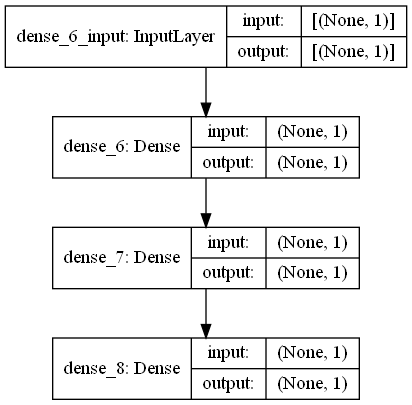

In [37]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True)

In [43]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/ste

In [44]:
y_predicts = model.predict(X_test)
y_predicts

array([[54.771538],
       [58.317333],
       [61.86313 ],
       [65.40893 ],
       [68.95472 ],
       [72.50052 ],
       [76.04631 ],
       [79.59211 ],
       [83.13791 ],
       [86.6837  ]], dtype=float32)

In [45]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = y_predicts
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, prediction, c="r", label="Predictions")
    plt.legend()

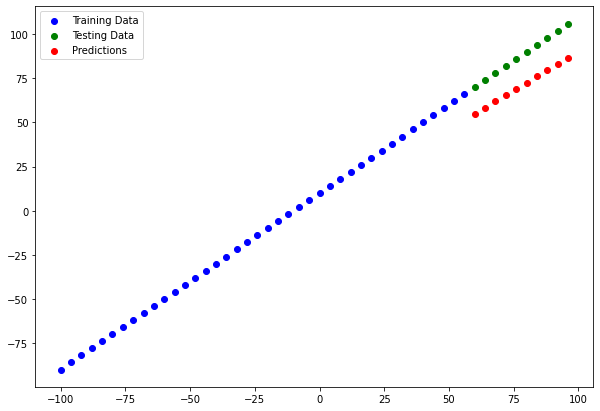

In [46]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = y_predicts
)

### 모델의 결과를 시각화하는 것도 중요하지만 metric을 확인하는것도 모델을 평가하는데 도움이 된다.

In [47]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 121ms/step - loss: 17.2724 - mae: 17.2724


[17.272380828857422, 17.272380828857422]

## regression (회귀) 문제에서 주로 많이 사용하는 지표 2가지
**1. Mean absolute error (MAE)** : 실제값과 예측값의 차이의 평균

**2. Mean squared error (MSE)** : 실제값과 예측값의 차이의 제곱의 평균

tensorflow의 model.evaluate()는 모델의 손실 함수의 값 뿐만이 아니라 metric까지 반환해준다! 

In [49]:
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_predicts
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.228462, 29.682667, 26.136871, 22.591072, 19.04528 , 15.999585,
       13.572214, 11.763156, 10.572418, 10.      ], dtype=float32)>

In [50]:
y_test, y_predicts

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[54.771538],
        [58.317333],
        [61.86313 ],
        [65.40893 ],
        [68.95472 ],
        [72.50052 ],
        [76.04631 ],
        [79.59211 ],
        [83.13791 ],
        [86.6837  ]], dtype=float32))

In [51]:
y_test.shape, y_predicts.shape

((10,), (10, 1))

In [52]:
y_predicts.squeeze().shape

(10,)

In [54]:
y_test, y_predicts.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([54.771538, 58.317333, 61.86313 , 65.40893 , 68.95472 , 72.50052 ,
        76.04631 , 79.59211 , 83.13791 , 86.6837  ], dtype=float32))

In [53]:
y_test.shape, y_predicts.squeeze().shape

((10,), (10,))

In [55]:
# MAE 구하기
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_predicts.squeeze()
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=17.27238>

In [56]:
# MSE 구하기
mse = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = y_predicts.squeeze()
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=300.0371>

In [57]:
tf.reduce_mean(tf.abs(y_test - y_predicts.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=17.272380447387697>

In [7]:
def mae(y_test, y_predicts):
    return tf.metrics.mean_absolute_error(y_test, y_predicts)

def mse(y_test, y_predicts):
    return tf.metrics.mean_squared_error(y_test,y_predicts)

### 모델이 평가한 예측도 살펴보고, metric도 평가해 본 후에 우리는 개선하기를 원함

### 개선시 주로 활용할 수 있는 3가지 방법 
**1. 더 많은 데이터** : 모델이 학습할 데이터를 주면 줄 수록 모델이 패턴을 찾을 기회는 많아진다.

**2. 모델을 더 확장 (좀 더 고급 모델로 만든다)** : 레이어를 추가하거나, 각 레이어를 이루는 neuron의 갯수를 조정

**3. 더 오래 학습을 한다.** : 데이터의 숨겨진 패턴을 찾는 더 많은 기회를 얻을 수 있다.

### 실습용 모델 3개 만들 예정

**1. model_1** : 원래 모델 그대로 사용 : layer 1개, epoch : 100

**2. model_2** : layer 2개 , epoch : 100

**3. model_3** : layer 3개 , epoch : 500

# Model_1 생성

In [63]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

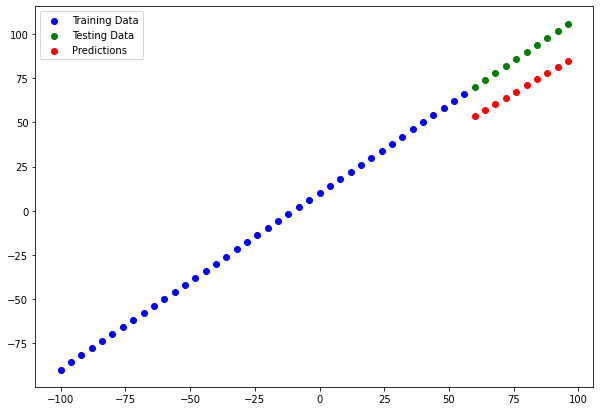

In [65]:
y_predicts_1 = model_1.predict(X_test)
plot_predictions(prediction= y_predicts_1)

In [72]:
mae_1 = mae(y_test, y_predicts_1.squeeze()).numpy()
mse_1 = mse(y_test, y_predicts_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

## Model_2 생성

In [74]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=0)

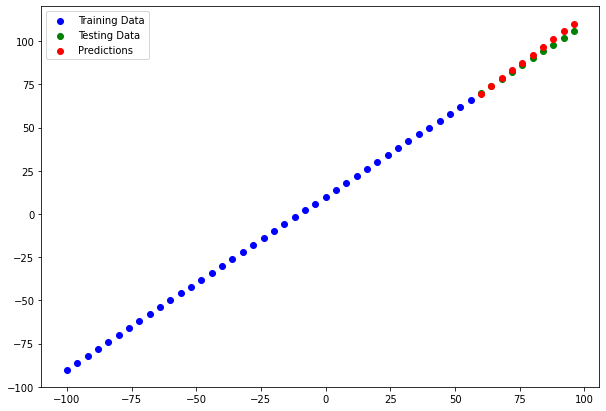

In [76]:
y_predicts_2 = model_2.predict(X_test)
plot_predictions(prediction= y_predicts_2)

In [77]:
mae_2 = mae(y_test, y_predicts_2.squeeze()).numpy()
mse_2 = mse(y_test, y_predicts_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

## model_3 생성

In [78]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_3.fit(X_train, y_train, epochs=500, verbose=0)

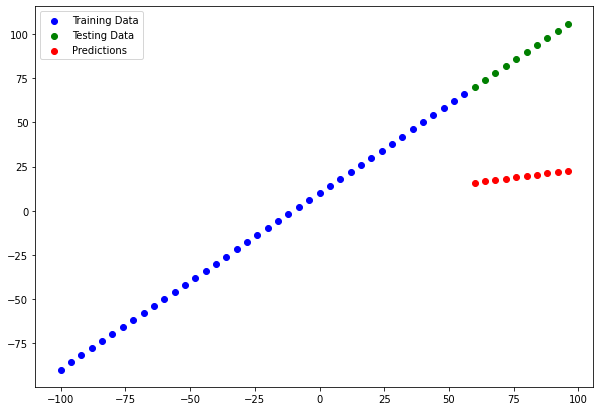

In [79]:
y_predicts_3 = model_3.predict(X_test)
plot_predictions(prediction= y_predicts_3)

In [80]:
mae_3 = mae(y_test, y_predicts_3.squeeze()).numpy()
mse_3 = mse(y_test, y_predicts_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

In [83]:
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3],
]
model_results

[['model_1', 18.745327, 353.57336],
 ['model_2', 1.9097328, 5.45877],
 ['model_3', 68.68784, 4804.469]]

In [85]:
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


### 위의 결과를 보면 model_2가 가장 좋은 결과를 얻는다는 것을 알 수 있다.
### 이런 과정이 머신 러닝 모델링 과정이며, 
### 이런 여러가지 조합을 해보고 최고의 성능을 내는 조합을 선택하는 과정

## 우리의 목표는 예측과 실제값의 차이를 줄이는 것이 목표
## 실험을 하면 할 수록, 무엇이 잘 안되고 무엇이 잘되는지 알 수 있다.
## 실험 -> 실험 -> 실험 계속 

## 현재까지 고생해서
### 모델을 학습시키고
### 가장 좋은 결과를 낼 수 있도록 모델을 튜닝했고
### 이제 우리는 그 모델을 저장해야 한다! 왜? -> 나중에 사용하고! 
### 어디에? -> 웹 애플리케이션이나 모바일 장비 등등
---
**model.save()**를 사용한다.
tensorflow에서 [모델을 저장하는 방법](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format
)

1. SavedModel 형식 (defalut) : 자동으로 특정 레이어를 저장할 수 있다. 대부분의 경우 사용

2. HDF5 형식

In [86]:
# SavedModel 형식
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [87]:
# HDF5 형식
model_2.save("best_model_HDF5_format.h5")

## 저장된 모델을 불러와서 활용!
load_model()

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [2]:
# SavedModel 형식의 모델을 불러오기 
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2_predicts_Saved_model = loaded_saved_model.predict(X_test)
model_2_predicts_Saved_model 

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [11]:
mae(y_test, model_2_predicts_Saved_model.squeeze()).numpy(), mse(y_test, model_2_predicts_Saved_model.squeeze()).numpy()

(1.9097328, 5.45877)

In [12]:
# HDF5 형식의 모델을 불러오기
loaded_saved_model_h5 = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_saved_model_h5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_2_predicts_h5 = loaded_saved_model.predict(X_test)
model_2_predicts_h5 

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [14]:
mae(y_test, model_2_predicts_h5.squeeze()).numpy(), mse(y_test, model_2_predicts_h5.squeeze()).numpy()

(1.9097328, 5.45877)

In [15]:
mae(y_test, model_2_predicts_Saved_model.squeeze()).numpy(), mse(y_test, model_2_predicts_Saved_model.squeeze()).numpy(),mae(y_test, model_2_predicts_h5.squeeze()).numpy(), mse(y_test, model_2_predicts_h5.squeeze()).numpy()

(1.9097328, 5.45877, 1.9097328, 5.45877)